<h1 align="center"> Anime Exploratory Data Analysis & Recommender </h1>

<hr style="border:4px solid Black">

[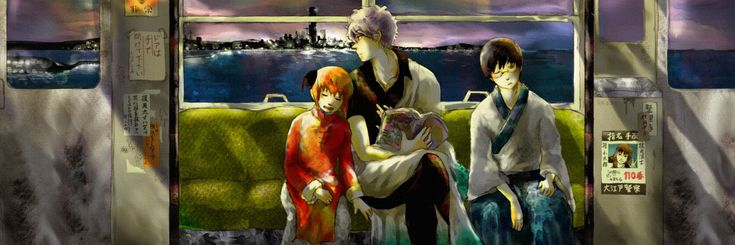](https://myanimelist.net/profile/Yoshai88) 
<p style="text-align: center;">click image to view my MAL profile</p>

<hr style="border:4px solid Black">

## Introduction

### About:

The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database) and inspired by this [publication](https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c).  

MAL ([MyAnimeList](https://myanimelist.net/)) is one of the biggest online anime and manga databases/communities. For many, it is the main website for tracking and keeping up with series, and discovering new anime recommendations. As an anime/manga enthusiast, I am also a frequent user of MAL's database. After using MAL for many years I am grateful for its existence but have noticed over time that there could be room for improvements, specifially their recommender system. 

Currently, the website's recommender system is purely based off of other individual users that submitted a recommendation review while tagging another single anime from the database that they feel resembles or share any similarities. While human recommenders have many strengths and specific advantages that cannot be replicated, many huge companies such as Tiktok, Amazon, Tinder, Netflix, and Spotify to name a few have found greater success utilizing applications of AI such as Machine Learning into their recommender systems.

### Objective:  
The goal of this project is to build a better recommender system with MAL's data. During the process we will utilize collaborative filtering based on user ratings while also applying k-nearest neighbors algorithm to measure the distance of similarity for the animes we are trying to recommend. In addition, we will first explore the dataset and provide exploratory data analysis to potentially find patterns and useful insights.

<hr style="border:4px solid Black">

## Table of Contents

1. **<span style="color:Blue">Introduction</span>**
    + About
    + Objective
2. **<span style="color:Blue">Table of Contents</span>**
3. **<span style="color:Blue">Exploratory Data Analysis</span>**
    + Libraries
    + Number of Unique Users & Number of Animes in the database recorded
    + Most Engaged Users
    + Top Animes by Members and Ratings
        + Most popular animes (Ranking based off their total members)
        + Highest Rated Animes (Ranking based off their average ratings)
    + Top Genres by Members and Ratings
        + Top Anime Genres based off its ratings
        + Most Popular Genres (Rankings based off total members)
        + Top Engaged Genres (Ranking based off total ratings given)
    + Top Categories(Type) by Anime Count and Ratings
        + Top Categories by Total Anime
        + Top Categories by Rating
4. **<span style="color:Blue">Pre-Processing Our Data</span>**
5. **<span style="color:Blue">Building Our Anime Recommender System</span>**

<hr style="border:4px solid Black">

## Exporatory Data Analysis (EDA)

We are going to work with two datasets:
+ anime_dataset - Collected data of animes registered in MAL database with their given id, genre, type, episode count, ratings, and total members.
+ anime_ratings - Collected data of user ratings in MAL database with their assigned id, anime id, and rating score.

**Note**: This dataset was last updated in 2016. Animes that were aired after 2016 would not exist and not work in the recommender.

### Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

In [2]:
anime_dataset = pd.read_csv(r"C:\Users\Yosua\Downloads\Anime Recommender Dataset\anime.csv")
anime_dataset.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
anime_ratings = pd.read_csv(r"C:\Users\Yosua\Downloads\Anime Recommender Dataset\rating.csv")
anime_ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


From the ratings dataset, -1 indicates that the user watched but didn't assign any rating

In [4]:
anime_dataset.dtypes, anime_dataset.shape

(anime_id      int64
 name         object
 genre        object
 type         object
 episodes     object
 rating      float64
 members       int64
 dtype: object,
 (12294, 7))

In [5]:
anime_ratings.dtypes, anime_ratings.shape

(user_id     int64
 anime_id    int64
 rating      int64
 dtype: object,
 (7813737, 3))

We will now merge the two datasets together for further exploratory analysis

In [6]:
anime_full_data = pd.merge(anime_dataset, anime_ratings, on= 'anime_id')
anime_full_data = anime_full_data.rename(columns = {"rating_x": "rating", "rating_y": "user_rating"})
anime_full_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [7]:
anime_full_data.shape

(7813727, 9)

### Number of Unique Users & Number of Animes in the database recorded

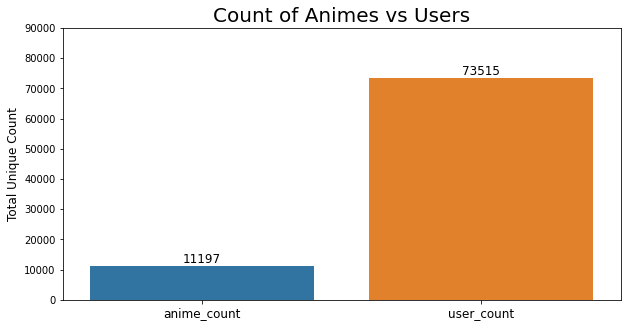

In [8]:
count_of_animes = anime_full_data['anime_id'].nunique()
count_of_users = anime_full_data['user_id'].nunique()
user_anime_count = pd.DataFrame([[count_of_animes], [count_of_users]], index = ['anime_count', 'user_count']).T


plt.figure(figsize=(10,5))

anime_user_barcount = sns.barplot(data = user_anime_count)
anime_user_barcount.set_title("Count of Animes vs Users", fontsize = 20)
anime_user_barcount.set_ylabel("Total Unique Count", fontsize = 12)
anime_user_barcount.bar_label(anime_user_barcount.containers[0], fontsize = 12)
anime_user_barcount.set_ylim(0, 90000)

plt.xticks(fontsize = 12)
plt.show()

### Most Engaged Users

Here we are measuring engagement based on how many ratings are given per each individual user.    
**Engagement** = Number of Rating Given  
**Most Engaged User** = User with the highest number of ratings given 

First things first, we are going to exclude users who did not give a rating

In [9]:
users_rating_logged = anime_full_data[anime_full_data['user_rating'] != -1]

In [10]:
ratings_given_per_user = pd.DataFrame(
    users_rating_logged['user_id'].value_counts().reset_index().set_axis(['user_id', 'rating_count'], axis='columns'))
ratings_given_per_user.head(10) #69600 user_ids

,user_id,rating_count
0,42635,3747
1,53698,2905
2,57620,2689
3,59643,2632
4,51693,2621
5,45659,2462
6,7345,2429
7,12431,2348
8,65840,2215
9,22434,1991


There exists a user in our database that has given over 3,700 ratings!  




There are many users who have watched multiple animes but have yet given even a single rating. We want to identify these users. Below is an example of a user chose at random who fits the criteria of having watched multiple animes but not giving a single rating.

In [11]:
non_rated_users = sorted(list(set(anime_full_data['user_id']) - set(ratings_given_per_user['user_id'])))
anime_full_data[anime_full_data['user_id'] == np.random.choice(non_rated_users)]

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
4147139,2424,Cardcaptor Sakura Specials,Comedy,Special,3,7.62,18604,52845,-1
4201386,1003,Aa! Megami-sama! (TV) Specials,"Comedy, Magic, Romance, Seinen, Supernatural",Special,3,7.61,19257,52845,-1
6595850,4190,Harukanaru Toki no Naka de 3: Kurenai no Tsuki...,"Comedy, Fantasy, Shoujo",Special,1,7.01,1010,52845,-1
7141262,2105,Touka Gettan,"Drama, Romance, Supernatural",TV,26,6.71,13921,52845,-1
7396132,3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1,6.44,2988,52845,-1


Just earlier we created a dataframe **ratings_given_per_user** that gives us users and their rating count. This data excluded the users who have not yet given a single rating. If we want to find the average number of ratings given by a single user we also need to include the users who have watched one or more animes but have yet given a single rating.

In [12]:
non_rated_users_df = pd.DataFrame({'user_id': non_rated_users, 
                                 'rating_count': 0})
updated_ratings_given_per_user = pd.concat([ratings_given_per_user, non_rated_users_df], ignore_index=True)


avg_ratings_given_per_user = sum(updated_ratings_given_per_user['rating_count'])/len(updated_ratings_given_per_user['user_id'])
avg_ratings_given_per_user 

86.20334625586615

**The average number of ratings given by a single user is about 86!**

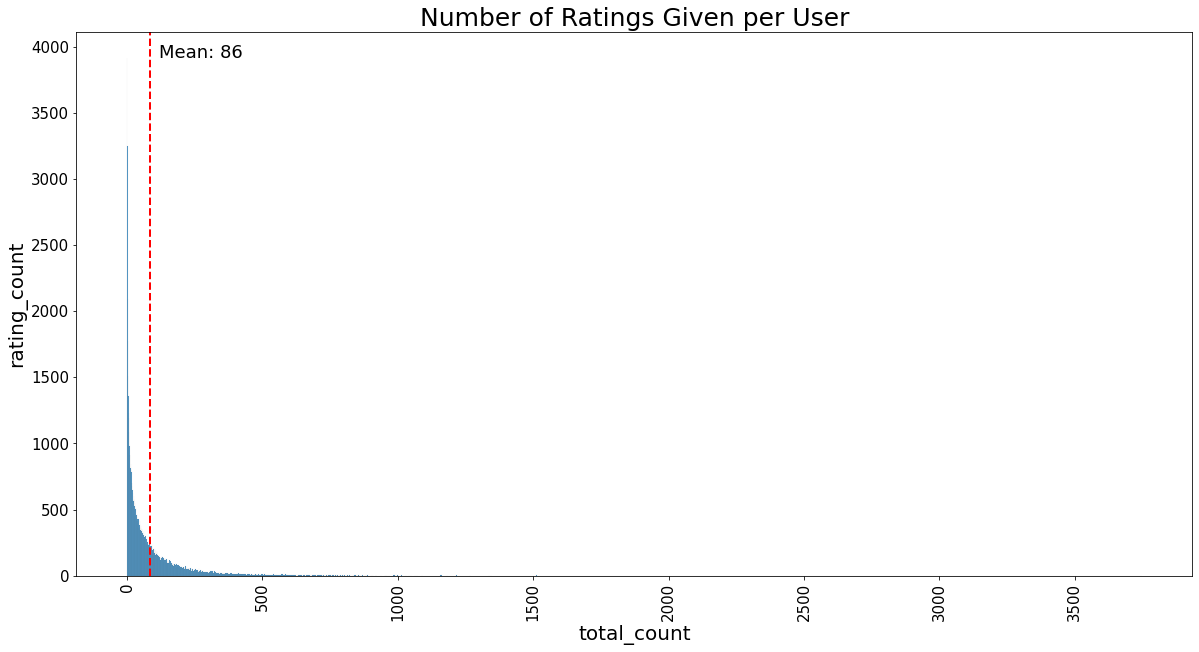

In [13]:
plt.figure(figsize=(20,10))

engaged_user_hist = sns.histplot(updated_ratings_given_per_user, x = 'rating_count', bins = 'auto', binwidth=1)
engaged_user_hist.set_title("Number of Ratings Given per User", fontsize = 25)
engaged_user_hist.set_xlabel("total_count", fontsize = 20)
engaged_user_hist.set_ylabel("rating_count", fontsize = 20)
#engaged_user_hist.bar_label(engaged_user_hist.containers[0])
engaged_user_hist.axvline(updated_ratings_given_per_user['rating_count'].mean(), color='red', lw=2, ls = '--')
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
#engaged_user_hist.set_xlim(75, 90)
plt.text(x = updated_ratings_given_per_user['rating_count'].mean()+30,
         y = max([h.get_height() for h in engaged_user_hist.patches]),
        s = 'Mean: {:.0f}'.format(updated_ratings_given_per_user['rating_count'].mean()),
        fontsize = 18)

plt.show()

### Top Animes by Members and Ratings

* **Most popular animes (Ranking based off their total members)**

In [14]:
popular_animes = anime_full_data.groupby('name')['members'].mean().sort_values(ascending=False)[:15]
popular_animes_df = pd.DataFrame(popular_animes).reset_index()
popular_animes_df

,name,members
0,Death Note,1013917.0
1,Shingeki no Kyojin,896229.0
2,Sword Art Online,893100.0
3,Fullmetal Alchemist: Brotherhood,793665.0
4,Angel Beats!,717796.0
5,Code Geass: Hangyaku no Lelouch,715151.0
6,Naruto,683297.0
7,Steins;Gate,673572.0
8,Mirai Nikki (TV),657190.0
9,Toradora!,633817.0


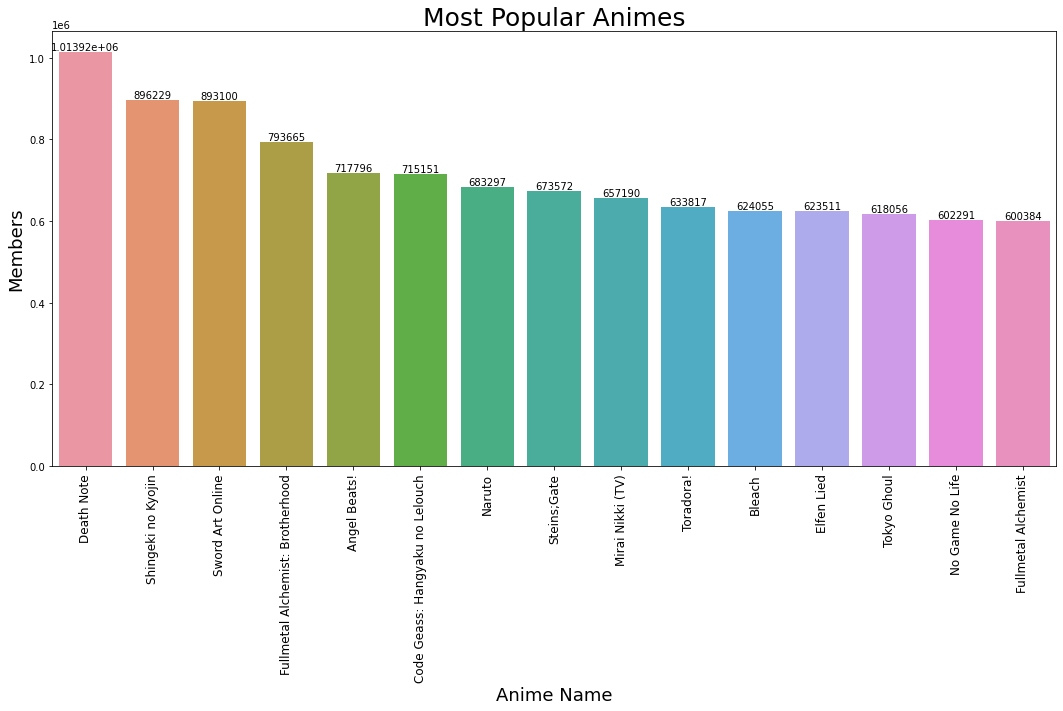

In [15]:
plt.figure(figsize=(18,8))

popular_anime_chart = sns.barplot(x = popular_animes_df['name'], y = popular_animes_df['members'])
popular_anime_chart.set_title("Most Popular Animes", fontsize = 25)
popular_anime_chart.set_xlabel("Anime Name", fontsize = 18)
popular_anime_chart.set_ylabel("Members", fontsize = 18)
popular_anime_chart.bar_label(popular_anime_chart.containers[0])
plt.xticks(rotation=90, fontsize = 12)

plt.show()

* **Highest Rated Animes (Ranking based off their average ratings)**

In [16]:
top_rated_anime = anime_full_data.groupby('name')['rating'].mean().sort_values(ascending = False)
top_rated_anime_df = pd.DataFrame(top_rated_anime).reset_index()[:15]
top_rated_anime_df

,name,rating
0,Mogura no Motoro,9.50
1,Kimi no Na wa.,9.37
2,Fullmetal Alchemist: Brotherhood,9.26
3,Gintama°,9.25
4,Yakusoku: Africa Mizu to Midori,9.25
5,Steins;Gate,9.17
6,Gintama&#039;,9.16
7,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.15
8,Hunter x Hunter (2011),9.13
9,Gintama&#039;: Enchousen,9.11


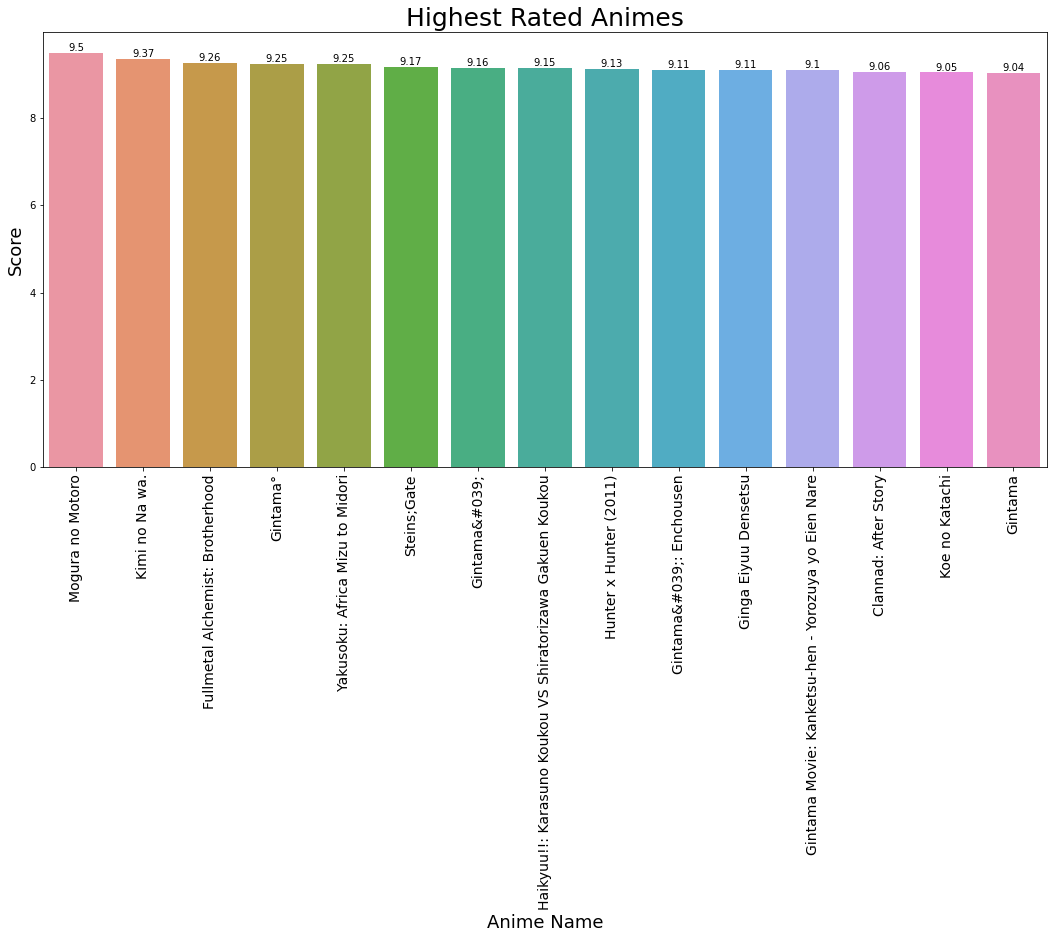

In [17]:
plt.figure(figsize=(18,8))

top_rated_anime_chart = sns.barplot(x = top_rated_anime_df['name'], y = top_rated_anime_df['rating'])
top_rated_anime_chart.set_title("Highest Rated Animes", fontsize = 25)
top_rated_anime_chart.set_xlabel("Anime Name", fontsize = 18)
top_rated_anime_chart.set_ylabel("Score", fontsize = 18)
top_rated_anime_chart.bar_label(top_rated_anime_chart.containers[0])
plt.xticks(rotation=90, fontsize = 14)

plt.show()

### Top Genres by Members and Ratings  

In [18]:
anime_genre_split = users_rating_logged.copy() # use users_rating_logged instead of anime_full_data for counting ratings given.
genre_data = anime_genre_split.groupby(
    ['name', 'genre']).agg(
    rating = ('rating', np.mean),
    members = ('members', np.mean), 
    ratings_given = ('user_rating', 'count')).sort_values(by='rating', ascending=False).reset_index()
genre_data

,name,genre,rating,members,ratings_given
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630,1961
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,793665,21494
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,114262,1188
3,Steins;Gate,"Sci-Fi, Thriller",9.17,673572,17151
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,151266,3115
...,...,...,...,...,...
9889,Hametsu no Mars,"Horror, Sci-Fi",2.37,27557,1024
9890,Utsu Musume Sayuri,"Comedy, Dementia",2.14,4047,76
9891,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",2.00,7680,210
9892,Cencoroll 2,"Action, Sci-Fi",NaN,15181,1


We need to clean the values for genre.  
  
First split among the animes that contain multiple genres into a list. Then we explode the genre column to split genres in the series that are labeled with multiple genres.  

Here is a visual example down below:

In [19]:
genre_data['genre'] =  genre_data['genre'].str.split(', ')
genre_data = genre_data.explode('genre')
genre_data.head()

,name,genre,rating,members,ratings_given
0,Kimi no Na wa.,Drama,9.37,200630,1961
0,Kimi no Na wa.,Romance,9.37,200630,1961
0,Kimi no Na wa.,School,9.37,200630,1961
0,Kimi no Na wa.,Supernatural,9.37,200630,1961
1,Fullmetal Alchemist: Brotherhood,Action,9.26,793665,21494


* **Top Anime Genres based off its ratings**

In [20]:
top_rated_genres = genre_data.groupby('genre')['rating'].mean().sort_values(ascending=False)
top_rated_genres_df = pd.DataFrame(top_rated_genres).reset_index()
top_rated_genres_df.head(10)

,genre,rating
0,Josei,7.466200
1,Thriller,7.422073
2,Mystery,7.262882
3,Police,7.184294
4,Shounen,7.156580
5,Drama,7.062181
6,Supernatural,7.039839
7,Seinen,7.034215
8,School,7.025221
9,Military,7.024838


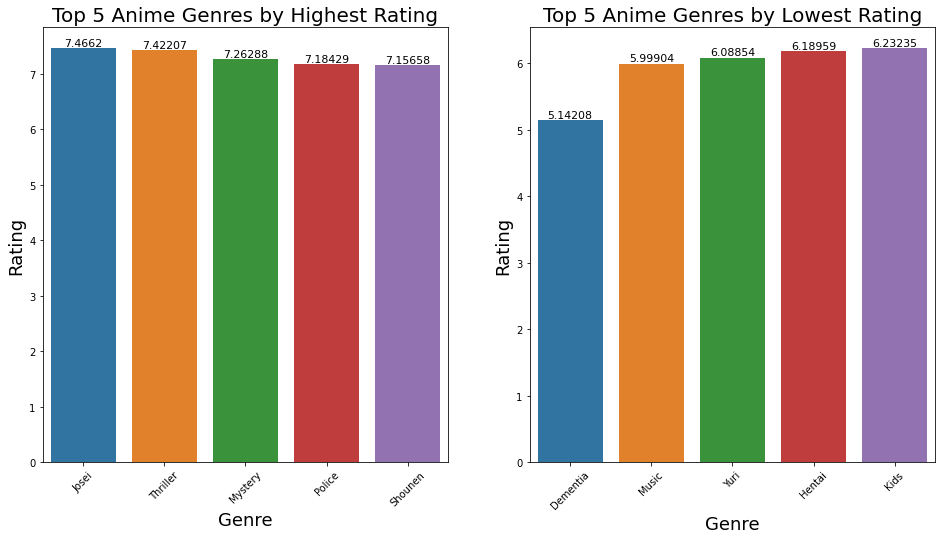

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,  figsize=(16,8))

top_rated_genres_chart = sns.barplot(ax = axes[0], x = top_rated_genres_df[:5]['genre'], y = top_rated_genres_df[:5]['rating'])
top_rated_genres_chart.set_title("Top 5 Anime Genres by Highest Rating", fontsize = 20)
top_rated_genres_chart.set_xlabel("Genre", fontsize = 18)
top_rated_genres_chart.set_ylabel("Rating", fontsize = 18)
top_rated_genres_chart.bar_label(top_rated_genres_chart.containers[0], fontsize = 11)

top_rated_genres_chart = sns.barplot(ax = axes[1], x = top_rated_genres_df[::-1][:5]['genre'], y = top_rated_genres_df[::-1][:5]['rating'])
top_rated_genres_chart.set_title("Top 5 Anime Genres by Lowest Rating", fontsize = 20)
top_rated_genres_chart.set_xlabel("Genre", fontsize = 18)
top_rated_genres_chart.set_ylabel("Rating", fontsize = 18)
top_rated_genres_chart.bar_label(top_rated_genres_chart.containers[0], fontsize = 11)

axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)

plt.show()

* **Most Popular Genres (Rankings based off total members)**

In [22]:
popular_genres = genre_data.groupby('genre')['members'].sum().sort_values(ascending=False)
popular_genres_df = pd.DataFrame(popular_genres).reset_index()
popular_genres_df.head(10)

,genre,members
0,Comedy,104163362
1,Action,92459370
2,Romance,65252183
3,Drama,56920138
4,Supernatural,55842437
5,Fantasy,55251505
6,School,54207606
7,Shounen,51794619
8,Sci-Fi,44342531
9,Adventure,44259487


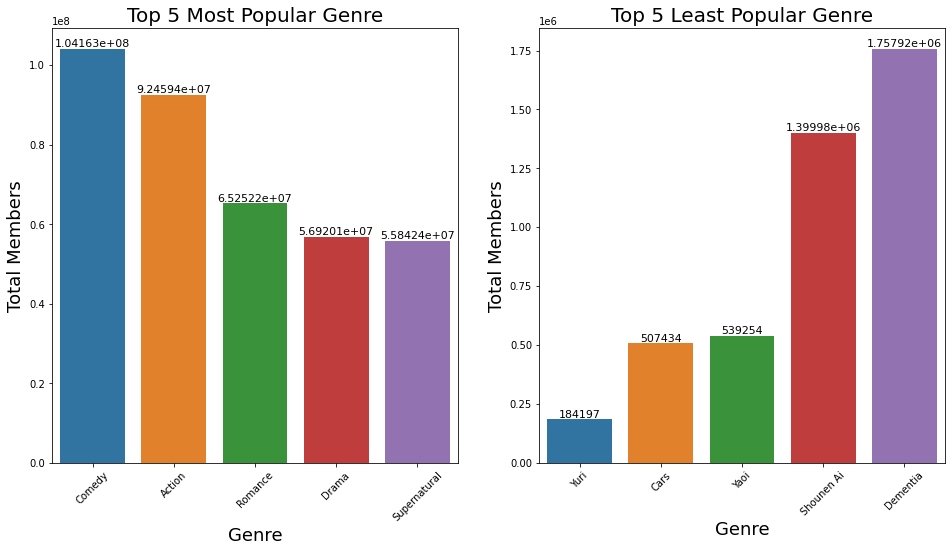

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,  figsize=(16,8))

popular_genres_chart = sns.barplot(ax = axes[0], x = popular_genres_df[:5]['genre'], y = popular_genres_df[:5]['members'])
popular_genres_chart.set_title("Top 5 Most Popular Genre", fontsize = 20)
popular_genres_chart.set_xlabel("Genre", fontsize = 18)
popular_genres_chart.set_ylabel("Total Members", fontsize = 18)
popular_genres_chart.bar_label(popular_genres_chart.containers[0], fontsize = 11)

popular_genres_chart = sns.barplot(ax = axes[1], x = popular_genres_df[::-1][:5]['genre'], y = popular_genres_df[::-1][:5]['members'])
popular_genres_chart.set_title("Top 5 Least Popular Genre", fontsize = 20)
popular_genres_chart.set_xlabel("Genre", fontsize = 18)
popular_genres_chart.set_ylabel("Total Members", fontsize = 18)
popular_genres_chart.bar_label(popular_genres_chart.containers[0], fontsize = 11)

axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)

plt.show()

* **Top Engaged Genres (Ranking based off total ratings given)**

In [24]:
engaged_genres = genre_data.groupby('genre')['ratings_given'].sum().sort_values(ascending=False)
engaged_genres_df = pd.DataFrame(engaged_genres).reset_index()
engaged_genres_df.head(10)

,genre,ratings_given
0,Comedy,3150030
1,Action,2663844
2,Romance,2031673
3,Drama,1727683
4,Fantasy,1629076
5,Supernatural,1612457
6,School,1540798
7,Shounen,1514012
8,Adventure,1365199
9,Sci-Fi,1319454


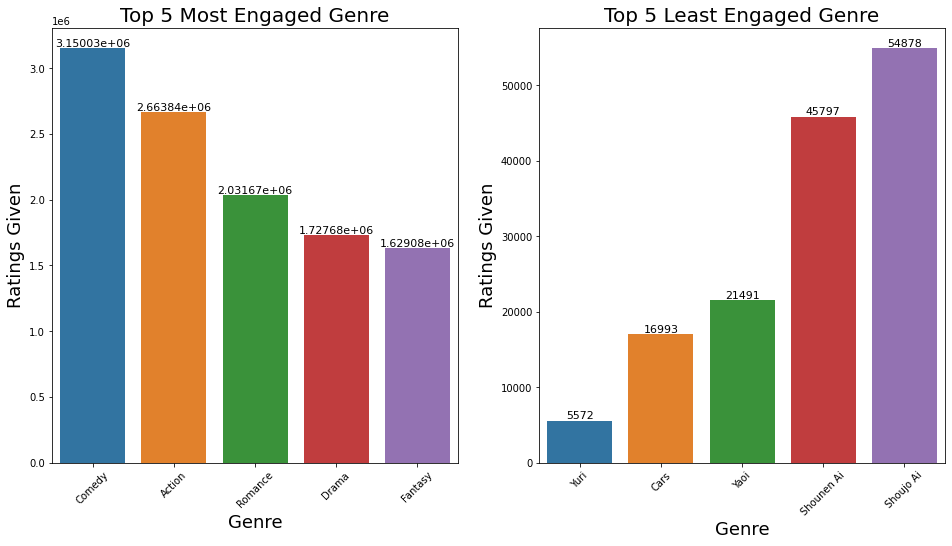

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,  figsize=(16,8))

engaged_genres_chart = sns.barplot(ax = axes[0], x = engaged_genres_df[:5]['genre'], y = engaged_genres_df[:5]['ratings_given'])
engaged_genres_chart.set_title("Top 5 Most Engaged Genre", fontsize = 20)
engaged_genres_chart.set_xlabel("Genre", fontsize = 18)
engaged_genres_chart.set_ylabel("Ratings Given", fontsize = 18)
engaged_genres_chart.bar_label(engaged_genres_chart.containers[0], fontsize = 11)

engaged_genres_chart = sns.barplot(ax = axes[1], x = engaged_genres_df[::-1][:5]['genre'], y = engaged_genres_df[::-1][:5]['ratings_given'])
engaged_genres_chart.set_title("Top 5 Least Engaged Genre", fontsize = 20)
engaged_genres_chart.set_xlabel("Genre", fontsize = 18)
engaged_genres_chart.set_ylabel("Ratings Given", fontsize = 18)
engaged_genres_chart.bar_label(engaged_genres_chart.containers[0], fontsize = 11)

axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45)

plt.show()

At a glimpse, we can see that genre popularity (total members) correlates with genre engagement (total number of ratings given) based off the genre's ranking order.  

In [26]:
test = pd.DataFrame({'genre_popularity': list(popular_genres_df['members']), 'genre_engagement': list(engaged_genres_df['ratings_given'])})
test.corr()

,genre_popularity,genre_engagement
genre_popularity,1.000000,0.999248
genre_engagement,0.999248,1.000000


C:\Users\Yosua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


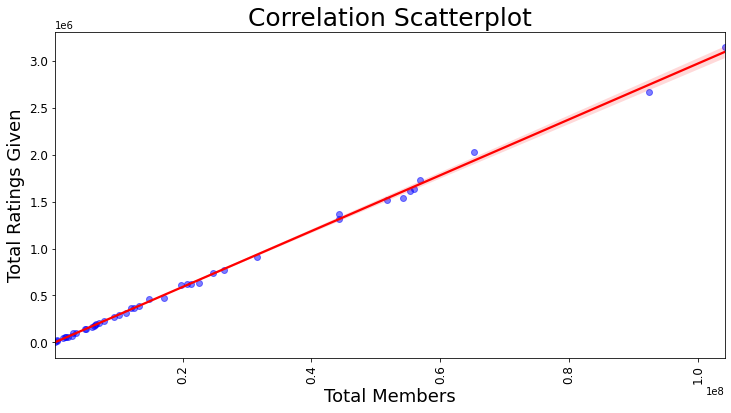

In [27]:
plt.figure(figsize=(12,6))

popularity_engagement_corr = sns.regplot(list(popular_genres_df['members']), list(engaged_genres_df['ratings_given']),
                                        line_kws = {'color': 'red'},
                                        scatter_kws = {'color': 'blue', 'alpha': 0.5})

popularity_engagement_corr.set_title("Correlation Scatterplot", fontsize = 25)
popularity_engagement_corr.set_xlabel("Total Members", fontsize = 18)
popularity_engagement_corr.set_ylabel("Total Ratings Given", fontsize = 18)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

**Some interesting insights:**  
Supernatural genre fanbase ranks higher in popularity over the fantasy genre fanbase. On the contrary, the fantasy genre fanbase ranks higher in engagement over the supernatural genre fanbase. What we can conclude is that the fantasy fanbase is the more active fanbase on MAL given that they are more engaged by the numbers despite being smaller in size. 

In [28]:
popular_genres_df['rank_order'] = popular_genres_df['members'].rank(ascending=False)
engaged_genres_df['rank_order'] = engaged_genres_df['ratings_given'].rank(ascending=False)
x = popular_genres_df.merge(engaged_genres_df, on = 'rank_order')
x.columns = ['popular_genres', 'members', 'rank_order', 'engaged_genres', 'ratings_given']
x.head(10)

,popular_genres,members,rank_order,engaged_genres,ratings_given
0,Comedy,104163362,1.0,Comedy,3150030
1,Action,92459370,2.0,Action,2663844
2,Romance,65252183,3.0,Romance,2031673
3,Drama,56920138,4.0,Drama,1727683
4,Supernatural,55842437,5.0,Fantasy,1629076
5,Fantasy,55251505,6.0,Supernatural,1612457
6,School,54207606,7.0,School,1540798
7,Shounen,51794619,8.0,Shounen,1514012
8,Sci-Fi,44342531,9.0,Adventure,1365199
9,Adventure,44259487,10.0,Sci-Fi,1319454


### Top Categories(Type) by Anime Count and Ratings

* **Top Categories by Total Anime**

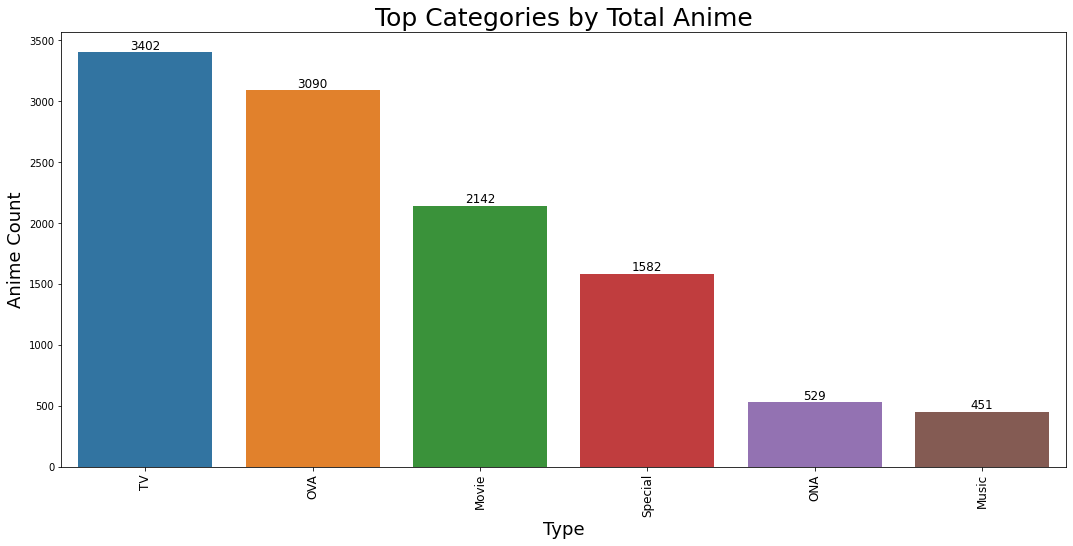

In [29]:
anime_cat_data = anime_full_data.groupby(['name', 'type']).agg(
    rating = ('rating', np.mean), total_anime = ('type', 'nunique')).reset_index()
anime_cat_data_deduped = anime_cat_data.groupby('type')['total_anime'].sum().sort_values(ascending=False)
anime_cat_data_deduped_df = pd.DataFrame(anime_cat_data_deduped).reset_index()


plt.figure(figsize=(18,8))

anime_cat_data_chart = sns.barplot(x = anime_cat_data_deduped_df['type'], y = anime_cat_data_deduped_df['total_anime'])
anime_cat_data_chart.set_title("Top Categories by Total Anime", fontsize = 25)
anime_cat_data_chart.set_xlabel("Type", fontsize = 18)
anime_cat_data_chart.set_ylabel("Anime Count", fontsize = 18)
anime_cat_data_chart.bar_label(anime_cat_data_chart.containers[0], fontsize = 12)
plt.xticks(rotation=90, fontsize = 12)

plt.show()

* **Top Categories by Rating**

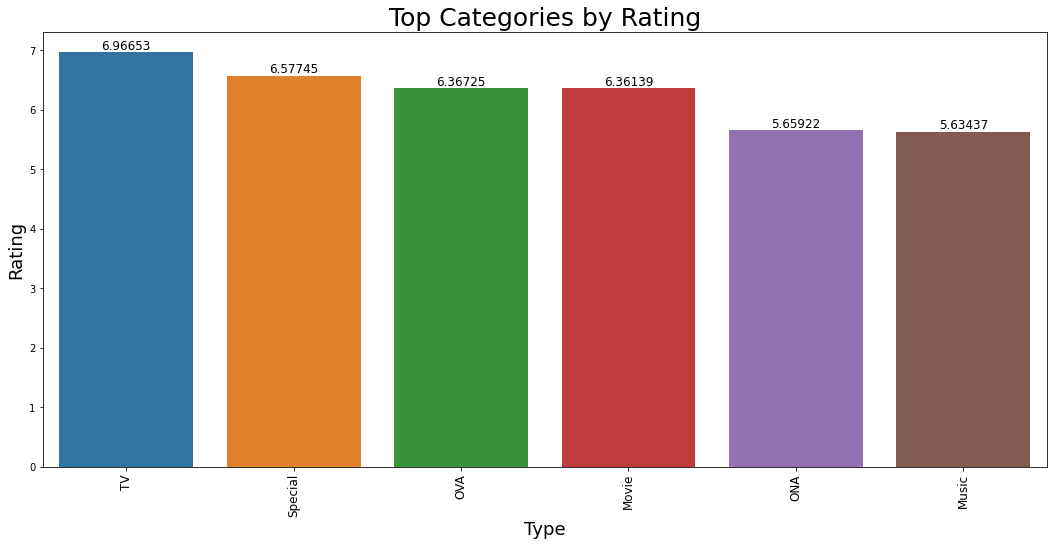

In [30]:
anime_cat_rating = anime_cat_data.groupby('type')['rating'].mean().sort_values(ascending=False)
anime_cat_rating_df = pd.DataFrame(anime_cat_rating).reset_index()


plt.figure(figsize=(18,8))

anime_cat_rating_chart = sns.barplot(x = anime_cat_rating_df['type'], y = anime_cat_rating_df['rating'])
anime_cat_rating_chart.set_title("Top Categories by Rating", fontsize = 25)
anime_cat_rating_chart.set_xlabel("Type", fontsize = 18)
anime_cat_rating_chart.set_ylabel("Rating", fontsize = 18)
anime_cat_rating_chart.bar_label(anime_cat_rating_chart.containers[0], fontsize = 12)
plt.xticks(rotation=90, fontsize = 12)

plt.show()

Let's be completely honest....who goes to an anime database and logs in music anyways 😆😆😆

<hr style="border:4px solid Black">

## Pre-Processing Our Data

From earlier we mentioned that in the ratings dataset, -1 indicates that the user have watched but didn't assign any rating.  
This means they did not rate it so therefore we will replace -1 with NaN. We will assume no ratings given NaN.

In [31]:
anime_full_data[anime_full_data['user_rating'] == -1]

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,684,-1
18,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,917,-1
29,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1133,-1
31,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1252,-1
...,...,...,...,...,...,...,...,...,...
7813721,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,27364,-1
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [32]:
anime_full_data['user_rating'].replace(-1, np.nan, inplace = True)
print("There are", anime_full_data['user_rating'].isnull().sum(), "number of times a users watched an anime without giving any rating.")


There are 1476488 number of times a users watched an anime without giving any rating.


Many users only rate once or just a few number of times. We want ONLY valuable users for our analysis so therefore we will consider a minimum of 20 ratings by the user as a threshold.

In [33]:
valuable_users = anime_full_data['user_id'].value_counts()
valuable_users

48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
19358        1
36998        1
54086        1
61326        1
8650         1
Name: user_id, Length: 73515, dtype: int64

In [34]:
valuable_users[valuable_users >= 20]

48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
23461       20
56574       20
15594       20
10847       20
44936       20
Name: user_id, Length: 54190, dtype: int64

In [35]:
anime_full_data_updated = anime_full_data[anime_full_data['user_id'].isin(valuable_users[valuable_users >= 20].index)]
anime_full_data_updated.shape

(7655650, 9)

With our updated data, let's create a pivot table which will later be utilized as a matrix to help us find the cosine similarity for our recommender.  
We will also replace the NaNs with zeros.

In [36]:
# Making our pivot table of users to anime by ratings value.
anime_users_ratings = anime_full_data_updated.pivot_table(index = 'user_id', columns = 'name', values = 'user_rating').fillna(0)
anime_users_ratings.head()

name,&quot;0&quot;,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
anime_users_ratings.shape

(51478, 9919)

Anime titles have special characters and symbols so we will need to clean it by using regular expressions to remove the unneccesary strings.

In [38]:
import re

def clean_title(anime_name):
    anime_name = re.sub(r'&quot;', '', anime_name)
    anime_name = re.sub(r'.hack//', '', anime_name)
    anime_name = re.sub(r'&#039;', '', anime_name)
    anime_name = re.sub(r'A&#039;s', '', anime_name)
    anime_name = re.sub(r'I&#039;', 'I\'', anime_name)
    anime_name = re.sub(r'&amp;', 'and', anime_name)
    return anime_name

In [39]:
anime_full_data_updated['name'] = anime_full_data_updated['name'].apply(clean_title)

<ipython-input-39-40cf1c4fd79a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_full_data_updated['name'] = anime_full_data_updated['name'].apply(clean_title)


In [40]:
anime_users_ratings = anime_full_data_updated.pivot_table(index = 'user_id', columns = 'name', values = 'user_rating').fillna(0)
anime_users_ratings.head()

name,0,001,009 Re:Cyborg,009-1,009-1: RandB,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We have finished pre-processing our data and now ready to move on to building our collaborative recommender system!**

<hr style="border:4px solid Black">

## Building Our Anime Recommender System

For this project we will utilize sklearn.neighbors from scikit-learn for computing the nearest neighbors. Before we calculate the cosine similarity between the rating vectors we first need to transpose and check the sparsity of our matrix.

In [41]:
sparsity = 1- np.count_nonzero(anime_users_ratings)/ anime_users_ratings.size
print(sparsity) 

0.9878670600342164


98.7% of rating values are filled with zero (not rated) and therfore we are working with a very sparse matrix. 
What this tells us is that there are many more animes out in the database to watch than the amount of user ratings given.
We can transform the value of the matrix into a scipy sparse matrix for better efficiency.

In [42]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

anime_users_ratings_transpose = anime_users_ratings.T
anime_users_ratings_matrix = csr_matrix(anime_users_ratings_transpose.values)

In [43]:
anime_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
anime_knn.fit(anime_users_ratings_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [44]:
matrix_dic = {} 
for i in range(0, len(anime_users_ratings_transpose.index)):
    matrix_dic[i] = matrix_dic.get(i, anime_users_ratings_transpose.index[i])

In [45]:
def anime_recommender(anime_title = ''):
    for key, value in matrix_dic.items():
        if value == anime_title:
            anime_title_index = key
        if anime_title == '':
            anime_title_index = np.random.choice(list(matrix_dic.keys()))
            anime_title = matrix_dic[anime_title_index]
               
    distances, indices = anime_knn.kneighbors(anime_users_ratings_transpose.loc[anime_title, :].values.reshape(1,-1), n_neighbors = 11)
    for i in range(0, len(distances.flatten())): # 0-10
        if i == 0:
            print('Recommendations for {0}\n'.format(anime_users_ratings_transpose.index[anime_title_index])) #error?!
        else:
            print('{0}: {1}'.format(i, anime_users_ratings_transpose.index[indices.flatten()[i]]))


**Type in the anime of your choice to get 10 other anime recommendations! If Function is left blank then it will generate a random anime with 10 other recommendations.**

In [46]:
anime_recommender('Fairy Tail')

Recommendations for Fairy Tail

1: Sword Art Online
2: Ao no Exorcist
3: Shingeki no Kyojin
4: Bleach
5: Fairy Tail Movie 1: Houou no Miko
6: Fairy Tail OVA
7: Magi: The Labyrinth of Magic
8: No Game No Life
9: Akame ga Kill!
10: Naruto


In [47]:
anime_recommender('')

Recommendations for Nodame Cantabile OVA

1: Nodame Cantabile OVA 2
2: Nodame Cantabile Special
3: Nodame Cantabile Finale Special
4: Nodame Cantabile: Paris-hen
5: Nodame Cantabile Finale
6: Nodame Cantabile
7: Hachimitsu to Clover Specials
8: Hachimitsu to Clover
9: Hachimitsu to Clover II
10: Bungaku Shoujo Kyou no Oyatsu: Hatsukoi


<hr style="border:4px solid Black">

<h1 align="center"> Thank You</h1>     

<hr style="border:4px solid Black">

**Feel free to contact me:**   

**Email:** yosua.jsaputra@gmail.com  
**LinkedIn:** https://www.linkedin.com/in/yosua-saputra  
**Website:** https://ohayosua.github.io/yosuajsaputra/  
**Github:** https://github.com/ohayosua/yosuajsaputra/tree/main/projects  

**My MAL Account 😁:** https://myanimelist.net/profile/Yoshai88

<h5 align="center"> This project is owned and created by Yosua Saputra  </h5>     